In [19]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

X = pd.read_csv('dataset_part_3.csv')
Y = pd.read_csv('dataset_part_2.csv')['Class'].to_numpy()
X = preprocessing.StandardScaler().fit_transform(X)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [20]:
# Logistic Regression
logreg_cv = GridSearchCV(LogisticRegression(), {'C':[0.01,0.1,1], 'penalty':['l2'], 'solver':['lbfgs']}, cv=10).fit(X_train, Y_train)

# SVM
svm_cv = GridSearchCV(SVC(), {'kernel':('linear', 'rbf','poly','sigmoid'), 'C': np.logspace(-3, 3, 5), 'gamma':np.logspace(-3, 3, 5)}, cv=10).fit(X_train, Y_train)

# Decision Tree (Fixed with 'sqrt')
tree_cv = GridSearchCV(DecisionTreeClassifier(), {'criterion': ['gini', 'entropy'], 'splitter': ['best', 'random'], 'max_depth': [2,4,6,8,10], 'max_features': ['sqrt'], 'min_samples_leaf': [1, 2, 4], 'min_samples_split': [2, 5, 10]}, cv=10).fit(X_train, Y_train)

# KNN
knn_cv = GridSearchCV(KNeighborsClassifier(), {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'], 'p': [1,2]}, cv=10).fit(X_train, Y_train)

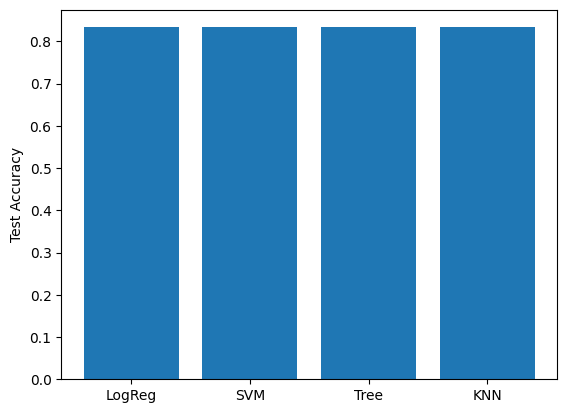

In [18]:
import matplotlib.pyplot as plt
scores = {'LogReg': logreg_cv.score(X_test, Y_test), 'SVM': svm_cv.score(X_test, Y_test), 'Tree': tree_cv.score(X_test, Y_test), 'KNN': knn_cv.score(X_test, Y_test)}
plt.bar(scores.keys(), scores.values())
plt.ylabel('Test Accuracy')
plt.show()

In [21]:
# See the best settings the models found
print(f"Logistic Regression Best Params: {logreg_cv.best_params_}")
print(f"SVM Best Params: {svm_cv.best_params_}")

# See the training accuracy (the "study" score)
print(f"Logistic Regression Train Accuracy: {logreg_cv.best_score_}")

Logistic Regression Best Params: {'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}
SVM Best Params: {'C': np.float64(1.0), 'gamma': np.float64(0.03162277660168379), 'kernel': 'sigmoid'}
Logistic Regression Train Accuracy: 0.8214285714285714


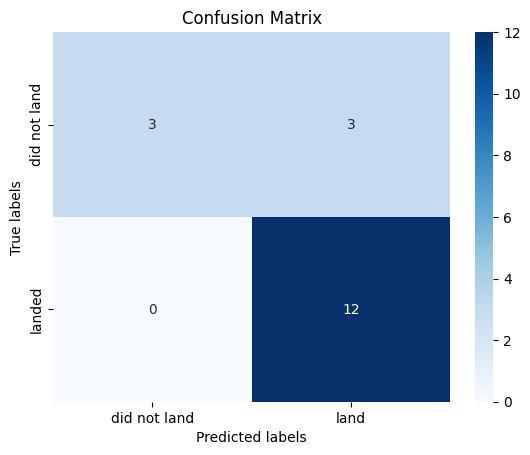

In [22]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

def plot_confusion_matrix(y,y_predict):
    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax, cmap="Blues");
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix');
    ax.xaxis.set_ticklabels(['did not land', 'land']); ax.yaxis.set_ticklabels(['did not land', 'landed'])

# Calculate predictions and plot
yhat = logreg_cv.predict(X_test)
plot_confusion_matrix(Y_test, yhat)